In [58]:
!pip install numpy
!pip install plotly
!pip install pandas
!pip install scipy
!pip install matplotlib
!pip install sklearn
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached sklearn-0.0.post5.tar.gz (3.7 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post5-py3-none-any.whl size=2950 sha256=7be7d00b6d888d79f2fbb879728da5a5e68492f4cc1dca3940056157aa9a7c17
  Stored in directory: /root/.cache/pip/wheels/38/1f/8d/4f812c590e074c1e928f5cec67bf5053b71f38e2648739403a
Successfully built sklearn
Looking in indexes: https:/

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

from scipy import interpolate
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing, metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [60]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
#import os
#os.chdir('/content/drive/My Drive/dataset/hackaton')

In [62]:
df = pd.read_csv("sources/data/test_well.csv")
df.head()

DT_HOUR  EXT_DATA  LIQ_RATE  OIL_RATE  WATER_CUT   PLIN  QGAS  \
0  2021-03-21 00:00:00         0       NaN       NaN        NaN    NaN   NaN   
1  2021-03-21 00:19:23         0       NaN       NaN        NaN  16.90   NaN   
2  2021-03-21 00:19:26         0       NaN       NaN        NaN    NaN   NaN   
3  2021-03-21 00:20:00         0       NaN       NaN        NaN    NaN   NaN   
4  2021-03-21 00:38:32         0       NaN       NaN        NaN  17.88   NaN   

   FREQ_HZ  ACTIV_POWER  PED_T   PINP   I_B   I_A   I_C   U_AB   U_BC   U_CA  \
0      NaN       67.925    NaN    NaN   NaN   NaN   NaN    NaN    NaN    NaN   
1      NaN          NaN    NaN    NaN   NaN   NaN   NaN    NaN    NaN    NaN   
2     40.0          NaN    0.0  37.17  29.5  29.4  29.6  396.0  399.0  399.0   
3      NaN       67.920    NaN    NaN   NaN   NaN   NaN    NaN    NaN    NaN   
4      NaN          NaN    NaN    NaN   NaN   NaN   NaN    NaN    NaN    NaN   

   U_OTP  COS_PHI  
0    NaN      NaN  
1    NaN      NaN  
2    NaN     71.0  
3    NaN      NaN  
4    NaN      NaN

In [63]:
df["LIQ_RATE"].count()

146

In [64]:
df.describe()

EXT_DATA    LIQ_RATE    OIL_RATE   WATER_CUT         PLIN  \
count  20020.000000  146.000000  146.000000  146.000000  6602.000000   
mean       0.855245  415.724247   45.484384   88.097397    17.879284   
std       10.060267   40.139969    4.454233    0.174743     0.350247   
min        0.000000    0.000000    0.000000   87.460000    10.890000   
25%        0.000000  403.240000   44.005000   87.980000    17.720000   
50%        0.000000  413.825000   44.995000   88.100000    17.920000   
75%        0.000000  436.287500   47.880000   88.220000    18.080000   
max      120.000000  463.690000   50.900000   88.540000    19.010000   

              QGAS      FREQ_HZ  ACTIV_POWER   PED_T         PINP  \
count   146.000000  6595.000000  6592.000000  6595.0  6595.000000   
mean   2165.620274    41.782948    77.426187     0.0    36.535782   
std     296.131190     1.701624     5.949151     0.0     0.377892   
min       0.000000     0.000000    56.005000     0.0    35.870000   
25%    2060.252500    41.000000    72.955000     0.0    36.170000   
50%    2211.950000    41.000000    73.748000     0.0    36.680000   
75%    2285.165000    43.000000    83.550000     0.0    36.810000   
max    2642.390000    43.000000    83.900000     0.0    39.220000   

               I_B          I_A          I_C         U_AB         U_BC  \
count  6596.000000  6596.000000  6595.000000  6595.000000  6595.000000   
mean     31.122165    31.111098    31.244458   394.055345   398.266262   
std       1.419314     1.416309     1.439096     2.871972     2.894213   
min       0.000000     0.000000     0.000000   380.000000   385.000000   
25%      30.300000    30.300000    30.400000   392.000000   397.000000   
50%      30.600000    30.600000    30.700000   394.000000   399.000000   
75%      32.200000    32.200000    32.400000   396.000000   401.000000   
max      32.400000    32.400000    32.500000   401.000000   403.000000   

              U_CA  U_OTP      COS_PHI  
count  6595.000000    0.0  6595.000000  
mean    397.039121    NaN    72.361183  
std       2.860467    NaN     2.449727  
min     384.000000    NaN     0.000000  
25%     396.000000    NaN    71.000000  
50%     397.000000    NaN    72.000000  
75%     399.000000    NaN    73.000000  
max     404.000000    NaN    74.000000

In [65]:
df = df.drop(["EXT_DATA", "PED_T", "U_OTP"], axis=1)

In [66]:
df.describe()

LIQ_RATE    OIL_RATE   WATER_CUT         PLIN         QGAS  \
count  146.000000  146.000000  146.000000  6602.000000   146.000000   
mean   415.724247   45.484384   88.097397    17.879284  2165.620274   
std     40.139969    4.454233    0.174743     0.350247   296.131190   
min      0.000000    0.000000   87.460000    10.890000     0.000000   
25%    403.240000   44.005000   87.980000    17.720000  2060.252500   
50%    413.825000   44.995000   88.100000    17.920000  2211.950000   
75%    436.287500   47.880000   88.220000    18.080000  2285.165000   
max    463.690000   50.900000   88.540000    19.010000  2642.390000   

           FREQ_HZ  ACTIV_POWER         PINP          I_B          I_A  \
count  6595.000000  6592.000000  6595.000000  6596.000000  6596.000000   
mean     41.782948    77.426187    36.535782    31.122165    31.111098   
std       1.701624     5.949151     0.377892     1.419314     1.416309   
min       0.000000    56.005000    35.870000     0.000000     0.000000   
25%      41.000000    72.955000    36.170000    30.300000    30.300000   
50%      41.000000    73.748000    36.680000    30.600000    30.600000   
75%      43.000000    83.550000    36.810000    32.200000    32.200000   
max      43.000000    83.900000    39.220000    32.400000    32.400000   

               I_C         U_AB         U_BC         U_CA      COS_PHI  
count  6595.000000  6595.000000  6595.000000  6595.000000  6595.000000  
mean     31.244458   394.055345   398.266262   397.039121    72.361183  
std       1.439096     2.871972     2.894213     2.860467     2.449727  
min       0.000000   380.000000   385.000000   384.000000     0.000000  
25%      30.400000   392.000000   397.000000   396.000000    71.000000  
50%      30.700000   394.000000   399.000000   397.000000    72.000000  
75%      32.400000   396.000000   401.000000   399.000000    73.000000  
max      32.500000   401.000000   403.000000   404.000000    74.000000

array([[<Axes: title={'center': 'LIQ_RATE'}>,
        <Axes: title={'center': 'OIL_RATE'}>,
        <Axes: title={'center': 'WATER_CUT'}>,
        <Axes: title={'center': 'PLIN'}>],
       [<Axes: title={'center': 'QGAS'}>,
        <Axes: title={'center': 'FREQ_HZ'}>,
        <Axes: title={'center': 'ACTIV_POWER'}>,
        <Axes: title={'center': 'PINP'}>],
       [<Axes: title={'center': 'I_B'}>, <Axes: title={'center': 'I_A'}>,
        <Axes: title={'center': 'I_C'}>,
        <Axes: title={'center': 'U_AB'}>],
       [<Axes: title={'center': 'U_BC'}>,
        <Axes: title={'center': 'U_CA'}>,
        <Axes: title={'center': 'COS_PHI'}>, <Axes: >]], dtype=object)

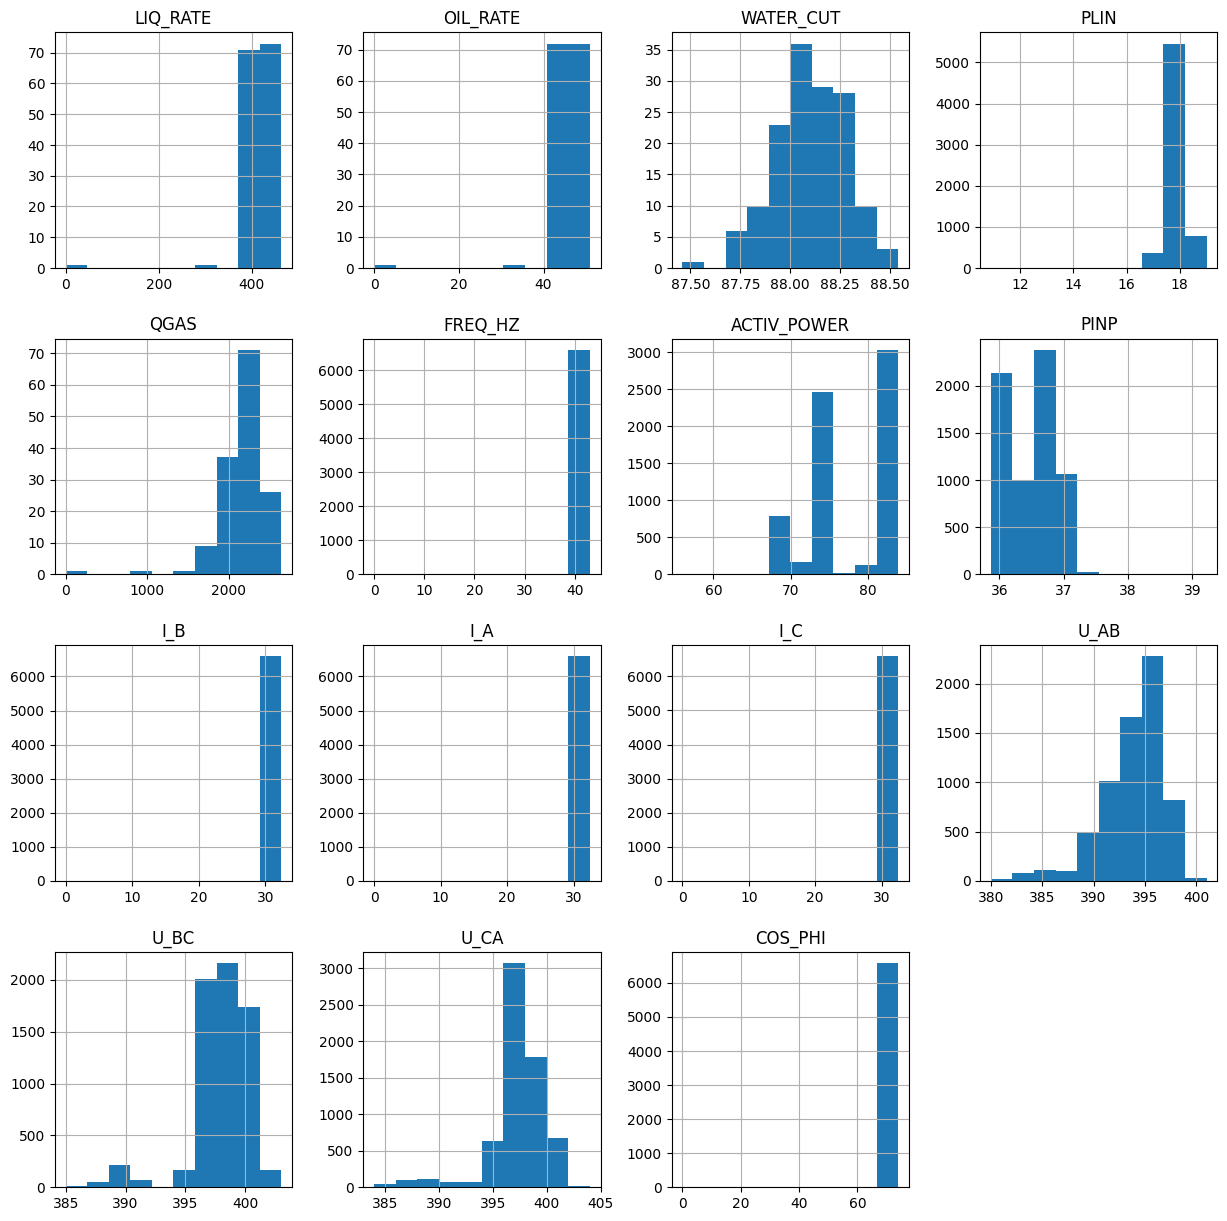

In [67]:
df.hist(figsize=(15, 15))

In [68]:
df.corr()

LIQ_RATE  OIL_RATE  WATER_CUT     PLIN      QGAS   FREQ_HZ  \
LIQ_RATE     1.000000  0.999124  -0.172351      NaN  0.736595       NaN   
OIL_RATE     0.999124  1.000000  -0.168536      NaN  0.738629       NaN   
WATER_CUT   -0.172351 -0.168536   1.000000      NaN -0.157836       NaN   
PLIN              NaN       NaN        NaN  1.00000       NaN       NaN   
QGAS         0.736595  0.738629  -0.157836      NaN  1.000000       NaN   
FREQ_HZ           NaN       NaN        NaN      NaN       NaN  1.000000   
ACTIV_POWER       NaN       NaN        NaN -0.29526       NaN  0.999951   
PINP              NaN       NaN        NaN      NaN       NaN -0.768043   
I_B               NaN       NaN        NaN      NaN       NaN  0.992460   
I_A               NaN       NaN        NaN      NaN       NaN  0.992585   
I_C               NaN       NaN        NaN      NaN       NaN  0.991434   
U_AB              NaN       NaN        NaN      NaN       NaN -0.229342   
U_BC              NaN       NaN        NaN      NaN       NaN -0.234222   
U_CA              NaN       NaN        NaN      NaN       NaN -0.229051   
COS_PHI           NaN       NaN        NaN      NaN       NaN  0.936505   

             ACTIV_POWER      PINP       I_B       I_A       I_C      U_AB  \
LIQ_RATE             NaN       NaN       NaN       NaN       NaN       NaN   
OIL_RATE             NaN       NaN       NaN       NaN       NaN       NaN   
WATER_CUT            NaN       NaN       NaN       NaN       NaN       NaN   
PLIN           -0.295260       NaN       NaN       NaN       NaN       NaN   
QGAS                 NaN       NaN       NaN       NaN       NaN       NaN   
FREQ_HZ         0.999951 -0.768043  0.992460  0.992585  0.991434 -0.229342   
ACTIV_POWER     1.000000 -0.982436  0.996465  0.986880  0.990603 -0.425663   
PINP           -0.982436  1.000000 -0.828992 -0.827719 -0.833122  0.347631   
I_B             0.996465 -0.828992  1.000000  0.998484  0.998387 -0.271918   
I_A             0.986880 -0.827719  0.998484  1.000000  0.998397 -0.271361   
I_C             0.990603 -0.833122  0.998387  0.998397  1.000000 -0.272992   
U_AB           -0.425663  0.347631 -0.271918 -0.271361 -0.272992  1.000000   
U_BC           -0.545837  0.353105 -0.279560 -0.278743 -0.280592  0.865970   
U_CA                 NaN  0.339842 -0.271348 -0.270548 -0.272323  0.847128   
COS_PHI         0.734255 -0.536600  0.897637  0.898353  0.894425 -0.181319   

                 U_BC      U_CA   COS_PHI  
LIQ_RATE          NaN       NaN       NaN  
OIL_RATE          NaN       NaN       NaN  
WATER_CUT         NaN       NaN       NaN  
PLIN              NaN       NaN       NaN  
QGAS              NaN       NaN       NaN  
FREQ_HZ     -0.234222 -0.229051  0.936505  
ACTIV_POWER -0.545837       NaN  0.734255  
PINP         0.353105  0.339842 -0.536600  
I_B         -0.279560 -0.271348  0.897637  
I_A         -0.278743 -0.270548  0.898353  
I_C         -0.280592 -0.272323  0.894425  
U_AB         0.865970  0.847128 -0.181319  
U_BC         1.000000  0.859717 -0.187399  
U_CA         0.859717  1.000000 -0.189155  
COS_PHI     -0.187399 -0.189155  1.000000

In [69]:
df["DT_HOUR"] = pd.to_datetime(df['DT_HOUR'], format='%Y-%m-%dT')
df

DT_HOUR  LIQ_RATE  OIL_RATE  WATER_CUT   PLIN  QGAS  \
0     2021-03-21 00:00:00       NaN       NaN        NaN    NaN   NaN   
1     2021-03-21 00:19:23       NaN       NaN        NaN  16.90   NaN   
2     2021-03-21 00:19:26       NaN       NaN        NaN    NaN   NaN   
3     2021-03-21 00:20:00       NaN       NaN        NaN    NaN   NaN   
4     2021-03-21 00:38:32       NaN       NaN        NaN  17.88   NaN   
...                   ...       ...       ...        ...    ...   ...   
20015 2021-06-20 23:39:18       NaN       NaN        NaN    NaN   NaN   
20016 2021-06-20 23:40:00       NaN       NaN        NaN    NaN   NaN   
20017 2021-06-20 23:59:47       NaN       NaN        NaN  18.18   NaN   
20018 2021-06-20 23:59:49       NaN       NaN        NaN    NaN   NaN   
20019 2021-06-20 23:59:59       NaN       NaN        NaN    NaN   NaN   

       FREQ_HZ  ACTIV_POWER   PINP   I_B   I_A   I_C   U_AB   U_BC   U_CA  \
0          NaN       67.925    NaN   NaN   NaN   NaN    NaN    NaN    NaN   
1          NaN          NaN    NaN   NaN   NaN   NaN    NaN    NaN    NaN   
2         40.0          NaN  37.17  29.5  29.4  29.6  396.0  399.0  399.0   
3          NaN       67.920    NaN   NaN   NaN   NaN    NaN    NaN    NaN   
4          NaN          NaN    NaN   NaN   NaN   NaN    NaN    NaN    NaN   
...        ...          ...    ...   ...   ...   ...    ...    ...    ...   
20015     43.0          NaN  36.02  32.2  32.2  32.4  394.0  397.0  397.0   
20016      NaN       83.540    NaN   NaN   NaN   NaN    NaN    NaN    NaN   
20017      NaN          NaN    NaN   NaN   NaN   NaN    NaN    NaN    NaN   
20018     43.0          NaN  36.03  32.2  32.3  32.3  394.0  399.0  397.0   
20019      NaN          NaN    NaN   NaN   NaN   NaN    NaN    NaN    NaN   

       COS_PHI  
0          NaN  
1          NaN  
2         71.0  
3          NaN  
4          NaN  
...        ...  
20015     74.0  
20016      NaN  
20017      NaN  
20018     74.0  
20019      NaN  

[20020 rows x 16 columns]

In [70]:
df["date"] = df['DT_HOUR'].apply(lambda x: x.strftime('%Y-%m-%d'))
df

DT_HOUR  LIQ_RATE  OIL_RATE  WATER_CUT   PLIN  QGAS  \
0     2021-03-21 00:00:00       NaN       NaN        NaN    NaN   NaN   
1     2021-03-21 00:19:23       NaN       NaN        NaN  16.90   NaN   
2     2021-03-21 00:19:26       NaN       NaN        NaN    NaN   NaN   
3     2021-03-21 00:20:00       NaN       NaN        NaN    NaN   NaN   
4     2021-03-21 00:38:32       NaN       NaN        NaN  17.88   NaN   
...                   ...       ...       ...        ...    ...   ...   
20015 2021-06-20 23:39:18       NaN       NaN        NaN    NaN   NaN   
20016 2021-06-20 23:40:00       NaN       NaN        NaN    NaN   NaN   
20017 2021-06-20 23:59:47       NaN       NaN        NaN  18.18   NaN   
20018 2021-06-20 23:59:49       NaN       NaN        NaN    NaN   NaN   
20019 2021-06-20 23:59:59       NaN       NaN        NaN    NaN   NaN   

       FREQ_HZ  ACTIV_POWER   PINP   I_B   I_A   I_C   U_AB   U_BC   U_CA  \
0          NaN       67.925    NaN   NaN   NaN   NaN    NaN    NaN    NaN   
1          NaN          NaN    NaN   NaN   NaN   NaN    NaN    NaN    NaN   
2         40.0          NaN  37.17  29.5  29.4  29.6  396.0  399.0  399.0   
3          NaN       67.920    NaN   NaN   NaN   NaN    NaN    NaN    NaN   
4          NaN          NaN    NaN   NaN   NaN   NaN    NaN    NaN    NaN   
...        ...          ...    ...   ...   ...   ...    ...    ...    ...   
20015     43.0          NaN  36.02  32.2  32.2  32.4  394.0  397.0  397.0   
20016      NaN       83.540    NaN   NaN   NaN   NaN    NaN    NaN    NaN   
20017      NaN          NaN    NaN   NaN   NaN   NaN    NaN    NaN    NaN   
20018     43.0          NaN  36.03  32.2  32.3  32.3  394.0  399.0  397.0   
20019      NaN          NaN    NaN   NaN   NaN   NaN    NaN    NaN    NaN   

       COS_PHI        date  
0          NaN  2021-03-21  
1          NaN  2021-03-21  
2         71.0  2021-03-21  
3          NaN  2021-03-21  
4          NaN  2021-03-21  
...        ...         ...  
20015     74.0  2021-06-20  
20016      NaN  2021-06-20  
20017      NaN  2021-06-20  
20018     74.0  2021-06-20  
20019      NaN  2021-06-20  

[20020 rows x 17 columns]

In [71]:
df = df.groupby("date").agg("mean")
df

LIQ_RATE  OIL_RATE  WATER_CUT       PLIN     QGAS  FREQ_HZ  \
date                                                                     
2021-03-21    388.84     42.61      87.46  17.755278  1853.77     40.0   
2021-03-22    390.57     42.59      88.04  17.674028  1809.27     40.0   
2021-03-23    395.10     42.47      87.95  17.800694  1822.53     40.0   
2021-03-24    389.34     42.54      88.02  17.786528  1855.33     40.0   
2021-03-25    391.28     42.55      88.22  17.830278  1827.74     40.0   
...              ...       ...        ...        ...      ...      ...   
2021-06-16    435.36     47.78      88.12  17.784167  2247.43     43.0   
2021-06-17    455.25     49.96      88.43  17.896250  1416.76     43.0   
2021-06-18    433.74     47.62      88.32  17.996143  2166.77     43.0   
2021-06-19    433.52     47.58      88.15  18.011389  2175.98     43.0   
2021-06-20    433.29     47.54      88.27  18.039167  2238.41     43.0   

            ACTIV_POWER       PINP        I_B        I_A        I_C  \
date                                                                  
2021-03-21    68.041444  37.168472  29.459722  29.461111  29.552778   
2021-03-22    68.106472  37.155556  29.462500  29.463889  29.563889   
2021-03-23    68.024792  37.147778  29.445833  29.441667  29.537500   
2021-03-24    68.118278  37.144306  29.451389  29.444444  29.534722   
2021-03-25    68.120028  37.135000  29.454167  29.445833  29.550000   
...                 ...        ...        ...        ...        ...   
2021-06-16    83.571292  36.037500  32.233333  32.198611  32.381944   
2021-06-17    83.633875  36.036111  32.219444  32.194444  32.362500   
2021-06-18    83.449194  36.037361  32.212500  32.205556  32.355556   
2021-06-19    83.525903  36.035694  32.220833  32.208333  32.373611   
2021-06-20    83.633708  36.036667  32.229167  32.202778  32.388889   

                  U_AB        U_BC        U_CA    COS_PHI  
date                                                       
2021-03-21  395.416667  398.861111  398.958333  71.000000  
2021-03-22  393.916667  399.166667  397.638889  71.000000  
2021-03-23  395.486111  400.666667  398.083333  71.000000  
2021-03-24  395.138889  400.083333  397.805556  71.000000  
2021-03-25  396.805556  399.916667  398.111111  71.000000  
...                ...         ...         ...        ...  
2021-06-16  394.777778  398.430556  396.736111  73.000000  
2021-06-17  392.361111  396.583333  395.194444  73.000000  
2021-06-18  391.611111  396.388889  395.000000  73.000000  
2021-06-19  392.722222  397.361111  395.958333  73.111111  
2021-06-20  393.694444  398.027778  396.541667  74.000000  

[92 rows x 15 columns]

In [72]:
# корреляция значений LIQ_RATE и U_AB

dft = df[["LIQ_RATE", "U_AB"]]

dft

LIQ_RATE        U_AB
date                            
2021-03-21    388.84  395.416667
2021-03-22    390.57  393.916667
2021-03-23    395.10  395.486111
2021-03-24    389.34  395.138889
2021-03-25    391.28  396.805556
...              ...         ...
2021-06-16    435.36  394.777778
2021-06-17    455.25  392.361111
2021-06-18    433.74  391.611111
2021-06-19    433.52  392.722222
2021-06-20    433.29  393.694444

[92 rows x 2 columns]

In [73]:
dft.corr()

LIQ_RATE      U_AB
LIQ_RATE  1.000000 -0.209855
U_AB     -0.209855  1.000000

In [74]:
# Модуль коэффициента корреляции маленький, значит дебит жидкости имеет слабую линейную от мощности

In [75]:
df = df.dropna(subset=['LIQ_RATE'])
df

LIQ_RATE  OIL_RATE  WATER_CUT       PLIN     QGAS  FREQ_HZ  \
date                                                                     
2021-03-21    388.84     42.61      87.46  17.755278  1853.77     40.0   
2021-03-22    390.57     42.59      88.04  17.674028  1809.27     40.0   
2021-03-23    395.10     42.47      87.95  17.800694  1822.53     40.0   
2021-03-24    389.34     42.54      88.02  17.786528  1855.33     40.0   
2021-03-25    391.28     42.55      88.22  17.830278  1827.74     40.0   
...              ...       ...        ...        ...      ...      ...   
2021-06-16    435.36     47.78      88.12  17.784167  2247.43     43.0   
2021-06-17    455.25     49.96      88.43  17.896250  1416.76     43.0   
2021-06-18    433.74     47.62      88.32  17.996143  2166.77     43.0   
2021-06-19    433.52     47.58      88.15  18.011389  2175.98     43.0   
2021-06-20    433.29     47.54      88.27  18.039167  2238.41     43.0   

            ACTIV_POWER       PINP        I_B        I_A        I_C  \
date                                                                  
2021-03-21    68.041444  37.168472  29.459722  29.461111  29.552778   
2021-03-22    68.106472  37.155556  29.462500  29.463889  29.563889   
2021-03-23    68.024792  37.147778  29.445833  29.441667  29.537500   
2021-03-24    68.118278  37.144306  29.451389  29.444444  29.534722   
2021-03-25    68.120028  37.135000  29.454167  29.445833  29.550000   
...                 ...        ...        ...        ...        ...   
2021-06-16    83.571292  36.037500  32.233333  32.198611  32.381944   
2021-06-17    83.633875  36.036111  32.219444  32.194444  32.362500   
2021-06-18    83.449194  36.037361  32.212500  32.205556  32.355556   
2021-06-19    83.525903  36.035694  32.220833  32.208333  32.373611   
2021-06-20    83.633708  36.036667  32.229167  32.202778  32.388889   

                  U_AB        U_BC        U_CA    COS_PHI  
date                                                       
2021-03-21  395.416667  398.861111  398.958333  71.000000  
2021-03-22  393.916667  399.166667  397.638889  71.000000  
2021-03-23  395.486111  400.666667  398.083333  71.000000  
2021-03-24  395.138889  400.083333  397.805556  71.000000  
2021-03-25  396.805556  399.916667  398.111111  71.000000  
...                ...         ...         ...        ...  
2021-06-16  394.777778  398.430556  396.736111  73.000000  
2021-06-17  392.361111  396.583333  395.194444  73.000000  
2021-06-18  391.611111  396.388889  395.000000  73.000000  
2021-06-19  392.722222  397.361111  395.958333  73.111111  
2021-06-20  393.694444  398.027778  396.541667  74.000000  

[88 rows x 15 columns]

<Axes: >

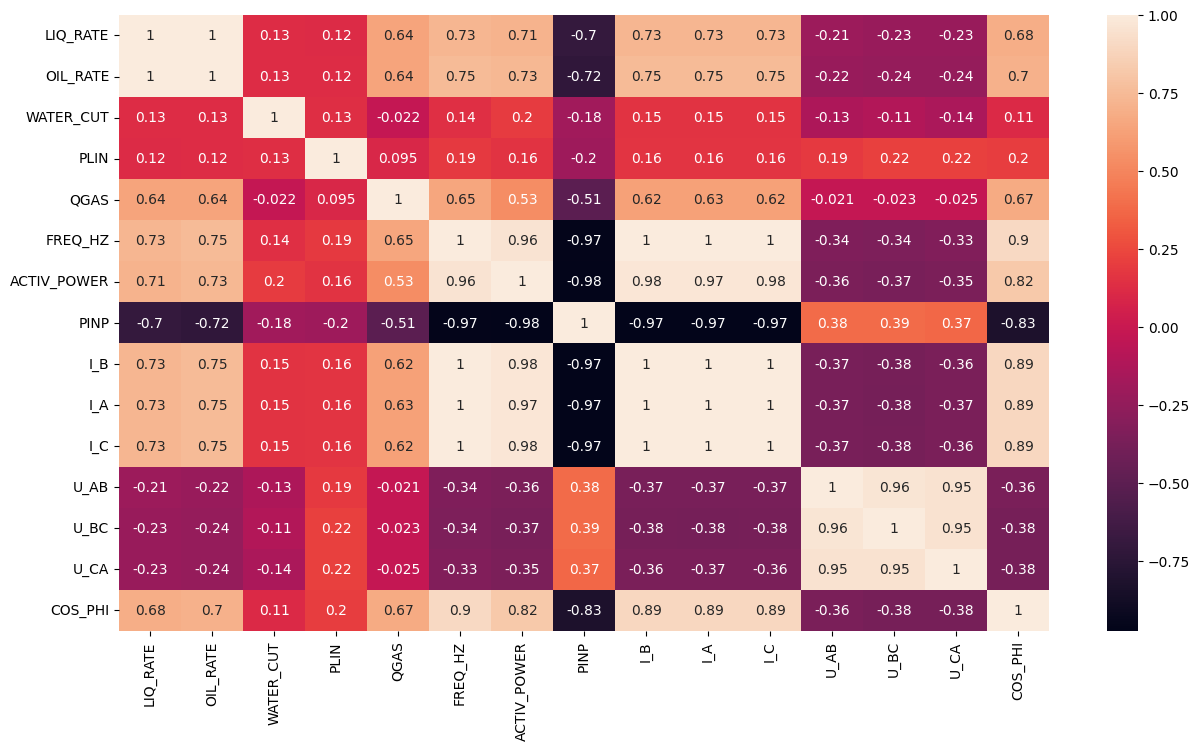

In [76]:
# Общая тепловая карта коэффициентов корреляции

plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, fmt=".2g")

In [77]:
Y = df["LIQ_RATE"]

# Выбрасываем значения, которые нужно прогнозировать
X = df.drop(["LIQ_RATE", "OIL_RATE", "WATER_CUT", "QGAS"], axis=1)
X

PLIN  FREQ_HZ  ACTIV_POWER       PINP        I_B        I_A  \
date                                                                           
2021-03-21  17.755278     40.0    68.041444  37.168472  29.459722  29.461111   
2021-03-22  17.674028     40.0    68.106472  37.155556  29.462500  29.463889   
2021-03-23  17.800694     40.0    68.024792  37.147778  29.445833  29.441667   
2021-03-24  17.786528     40.0    68.118278  37.144306  29.451389  29.444444   
2021-03-25  17.830278     40.0    68.120028  37.135000  29.454167  29.445833   
...               ...      ...          ...        ...        ...        ...   
2021-06-16  17.784167     43.0    83.571292  36.037500  32.233333  32.198611   
2021-06-17  17.896250     43.0    83.633875  36.036111  32.219444  32.194444   
2021-06-18  17.996143     43.0    83.449194  36.037361  32.212500  32.205556   
2021-06-19  18.011389     43.0    83.525903  36.035694  32.220833  32.208333   
2021-06-20  18.039167     43.0    83.633708  36.036667  32.229167  32.202778   

                  I_C        U_AB        U_BC        U_CA    COS_PHI  
date                                                                  
2021-03-21  29.552778  395.416667  398.861111  398.958333  71.000000  
2021-03-22  29.563889  393.916667  399.166667  397.638889  71.000000  
2021-03-23  29.537500  395.486111  400.666667  398.083333  71.000000  
2021-03-24  29.534722  395.138889  400.083333  397.805556  71.000000  
2021-03-25  29.550000  396.805556  399.916667  398.111111  71.000000  
...               ...         ...         ...         ...        ...  
2021-06-16  32.381944  394.777778  398.430556  396.736111  73.000000  
2021-06-17  32.362500  392.361111  396.583333  395.194444  73.000000  
2021-06-18  32.355556  391.611111  396.388889  395.000000  73.000000  
2021-06-19  32.373611  392.722222  397.361111  395.958333  73.111111  
2021-06-20  32.388889  393.694444  398.027778  396.541667  74.000000  

[88 rows x 11 columns]

In [78]:
# 88 строк - маленькое количество данных для нормального обучения :(

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [80]:
# Используем CatBoostRegression

In [81]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [82]:
from catboost import CatBoostRegressor

In [83]:
# Обучаем легкую модель для отбора параметров

tmpModel = CatBoostRegressor(iterations=10000,
                              depth=10,
                              loss_function='RMSE',
                              early_stopping_rounds=400)
tmpModel.fit(X_train, Y_train)

Y_predicted = tmpModel.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted)))
print('R2 Score:', metrics.r2_score(Y_test, Y_predicted))




Streaming output truncated to the last 5000 lines.
5004:	learn: 0.2593239	total: 33.8s	remaining: 33.7s
5005:	learn: 0.2591884	total: 33.8s	remaining: 33.7s
5006:	learn: 0.2590614	total: 33.8s	remaining: 33.7s
5007:	learn: 0.2589261	total: 33.8s	remaining: 33.7s
5008:	learn: 0.2586649	total: 33.8s	remaining: 33.7s
5009:	learn: 0.2585299	total: 33.8s	remaining: 33.7s
5010:	learn: 0.2584033	total: 33.8s	remaining: 33.7s
5011:	learn: 0.2582685	total: 33.8s	remaining: 33.7s
5012:	learn: 0.2580082	total: 33.8s	remaining: 33.7s
5013:	learn: 0.2578737	total: 33.8s	remaining: 33.6s
5014:	learn: 0.2577526	total: 33.8s	remaining: 33.6s
5015:	learn: 0.2576183	total: 33.8s	remaining: 33.6s
5016:	learn: 0.2573589	total: 33.9s	remaining: 33.6s
5017:	learn: 0.2572249	total: 33.9s	remaining: 33.6s
5018:	learn: 0.2570990	total: 33.9s	remaining: 33.6s
5019:	learn: 0.2569397	total: 33.9s	remaining: 33.6s
5020:	learn: 0.2566812	total: 33.9s	remaining: 33.6s
5021:	learn: 0.2565477	total: 33.9s	remaining: 3

Text(0.5, 1.0, 'Feature Importance')

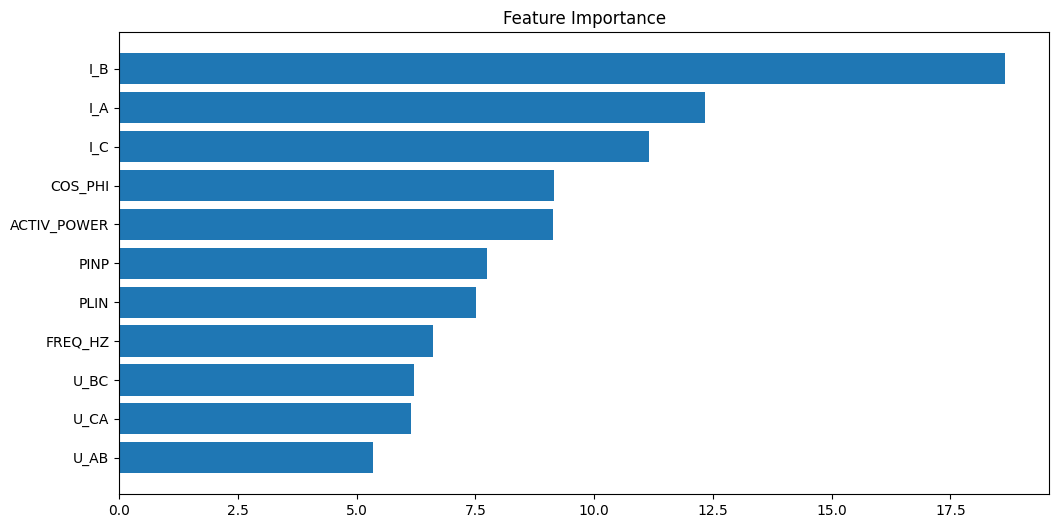

In [84]:
feature_importance = tmpModel.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [85]:
# Здесь видно, какие параметры оказываются наиболее важными при построении регрессии
# Но так как бОльшее количество параметров уменьшает коэффициент детерминации, оставим для итоговой модели только один параметр ACTIV_POWER

In [86]:
# Гипотеза: U_AB влияет на LIQ_RATE

In [87]:
X = df[["U_AB"]]
X

U_AB
date                  
2021-03-21  395.416667
2021-03-22  393.916667
2021-03-23  395.486111
2021-03-24  395.138889
2021-03-25  396.805556
...                ...
2021-06-16  394.777778
2021-06-17  392.361111
2021-06-18  391.611111
2021-06-19  392.722222
2021-06-20  393.694444

[88 rows x 1 columns]

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
Y_test

date
2021-06-09    436.725000
2021-03-21    388.840000
2021-04-18    402.840000
2021-04-14    403.980000
2021-04-04    403.615000
2021-05-31    437.075000
2021-04-02    404.650000
2021-04-10    403.415000
2021-03-25    391.280000
2021-06-01    439.126667
2021-06-18    433.740000
2021-05-28    438.470000
2021-05-15    439.310000
2021-06-13    434.850000
2021-06-17    455.250000
2021-05-27    435.840000
2021-04-25    404.295000
2021-06-12    435.530000
2021-05-17    439.595000
2021-06-06    435.395000
2021-04-03    404.400000
2021-04-22    404.360000
2021-05-02    403.860000
2021-04-20    403.860000
2021-04-01    406.440000
2021-05-30    437.950000
2021-03-26    390.040000
2021-05-01    399.030000
2021-04-23    402.230000
2021-04-27    404.025000
Name: LIQ_RATE, dtype: float64

In [89]:
# Обучаем модель только на основе U_AB
hypModel = CatBoostRegressor(iterations=10000,
                              depth=10,
                              loss_function='RMSE',
                              early_stopping_rounds=400)
hypModel.fit(X_train, Y_train)

Y_predicted = hypModel.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted)))
print('R2 Score:', metrics.r2_score(Y_test, Y_predicted))



Streaming output truncated to the last 5000 lines.
5004:	learn: 5.0220036	total: 8.11s	remaining: 8.09s
5005:	learn: 5.0215541	total: 8.11s	remaining: 8.09s
5006:	learn: 5.0209402	total: 8.11s	remaining: 8.09s
5007:	learn: 5.0203274	total: 8.12s	remaining: 8.09s
5008:	learn: 5.0197158	total: 8.12s	remaining: 8.09s
5009:	learn: 5.0195170	total: 8.12s	remaining: 8.09s
5010:	learn: 5.0189066	total: 8.12s	remaining: 8.09s
5011:	learn: 5.0185055	total: 8.13s	remaining: 8.09s
5012:	learn: 5.0178962	total: 8.13s	remaining: 8.09s
5013:	learn: 5.0176977	total: 8.14s	remaining: 8.09s
5014:	learn: 5.0170895	total: 8.14s	remaining: 8.09s
5015:	learn: 5.0166892	total: 8.14s	remaining: 8.09s
5016:	learn: 5.0160821	total: 8.14s	remaining: 8.09s
5017:	learn: 5.0154762	total: 8.14s	remaining: 8.09s
5018:	learn: 5.0150289	total: 8.14s	remaining: 8.08s
5019:	learn: 5.0148307	total: 8.16s	remaining: 8.09s
5020:	learn: 5.0142259	total: 8.16s	remaining: 8.09s
5021:	learn: 5.0136222	total: 8.17s	remaining: 8

In [90]:
# R2 меньше 0, значит смысла использовать U_AB для оценки LIQ_RATE не имеет смысла

In [91]:
X = df[["ACTIV_POWER"]]
X

ACTIV_POWER
date                   
2021-03-21    68.041444
2021-03-22    68.106472
2021-03-23    68.024792
2021-03-24    68.118278
2021-03-25    68.120028
...                 ...
2021-06-16    83.571292
2021-06-17    83.633875
2021-06-18    83.449194
2021-06-19    83.525903
2021-06-20    83.633708

[88 rows x 1 columns]

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
Y_test

date
2021-06-09    436.725000
2021-03-21    388.840000
2021-04-18    402.840000
2021-04-14    403.980000
2021-04-04    403.615000
2021-05-31    437.075000
2021-04-02    404.650000
2021-04-10    403.415000
2021-03-25    391.280000
2021-06-01    439.126667
2021-06-18    433.740000
2021-05-28    438.470000
2021-05-15    439.310000
2021-06-13    434.850000
2021-06-17    455.250000
2021-05-27    435.840000
2021-04-25    404.295000
2021-06-12    435.530000
2021-05-17    439.595000
2021-06-06    435.395000
2021-04-03    404.400000
2021-04-22    404.360000
2021-05-02    403.860000
2021-04-20    403.860000
2021-04-01    406.440000
2021-05-30    437.950000
2021-03-26    390.040000
2021-05-01    399.030000
2021-04-23    402.230000
2021-04-27    404.025000
Name: LIQ_RATE, dtype: float64

In [93]:
# Итоговая модель

model = CatBoostRegressor(iterations=100000,
                              depth=10,
                              loss_function='RMSE')
model.fit(X_train, Y_train)

Y_predicted = model.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_predicted))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted)))
print('R2 Score:', metrics.r2_score(Y_test, Y_predicted))

Streaming output truncated to the last 5000 lines.
95004:	learn: 0.1438692	total: 1m 53s	remaining: 5.99s
95005:	learn: 0.1438632	total: 1m 53s	remaining: 5.99s
95006:	learn: 0.1438568	total: 1m 53s	remaining: 5.99s
95007:	learn: 0.1438556	total: 1m 53s	remaining: 5.99s
95008:	learn: 0.1438496	total: 1m 53s	remaining: 5.99s
95009:	learn: 0.1438432	total: 1m 53s	remaining: 5.99s
95010:	learn: 0.1438419	total: 1m 53s	remaining: 5.98s
95011:	learn: 0.1438356	total: 1m 53s	remaining: 5.98s
95012:	learn: 0.1438296	total: 1m 53s	remaining: 5.98s
95013:	learn: 0.1438283	total: 1m 53s	remaining: 5.98s
95014:	learn: 0.1438219	total: 1m 53s	remaining: 5.98s
95015:	learn: 0.1438164	total: 1m 53s	remaining: 5.98s
95016:	learn: 0.1438104	total: 1m 53s	remaining: 5.98s
95017:	learn: 0.1438040	total: 1m 53s	remaining: 5.98s
95018:	learn: 0.1437977	total: 1m 53s	remaining: 5.97s
95019:	learn: 0.1437964	total: 1m 53s	remaining: 5.97s
95020:	learn: 0.1437904	total: 1m 53s	remaining: 5.97s
95021:	learn: 